<a href="https://colab.research.google.com/github/NMashalov/2023_OpenMipt_course/blob/main/lesson11/dz11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 60 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 50 баллов





-----

In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta

from statsmodels.stats.proportion import proportion_confint

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [ ]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---
### Задача 1
#### **Профиль физика**

Рассмотрим [данные](https://drive.google.com/file/d/1qGNN9pcSg6safgxqvWeimQEPtlyggOYc/view?usp=share_link) из первой задачи прошлого домашнего задания, нам понадобится только поперечный импульс `pT` мюона $\pi^+$ (`id = 211`). В предположении, что дисперсия значений не зависит от типа мюона, посчитайте с помощью формулы `MDE`, сколько мюонов каждого из двух исследуемых типов надо измерить, чтобы задетектировать разницу в средних импульсах равной 0.02? Можно ли снизить это число и из каких соображений? Сделайте соотвветсвующие вычисления

Выгрузим данные.

In [4]:
!gdown 1qGNN9pcSg6safgxqvWeimQEPtlyggOYc

Downloading...
From: https://drive.google.com/uc?id=1qGNN9pcSg6safgxqvWeimQEPtlyggOYc
To: /content/pi.csv
100% 1.97M/1.97M [00:00<00:00, 145MB/s]


In [42]:
df = pd.read_csv('pi.csv')
df.head()

,pT,xF,E,mP,eta,type
0,0.448320,0.099981,0.982772,9.059752,4.096336,0
1,0.789911,-0.016602,0.814856,3.563486,2.518421,0
2,0.499975,-0.124139,1.191020,2.074630,1.471015,1
3,0.025370,0.004610,0.147337,4.236236,4.676719,0
4,0.097505,-0.010402,0.192495,2.962972,2.724043,0


Выделим нужные нам.

In [6]:
pT_plus = df['pT']

Посмотрим на гистограмму.

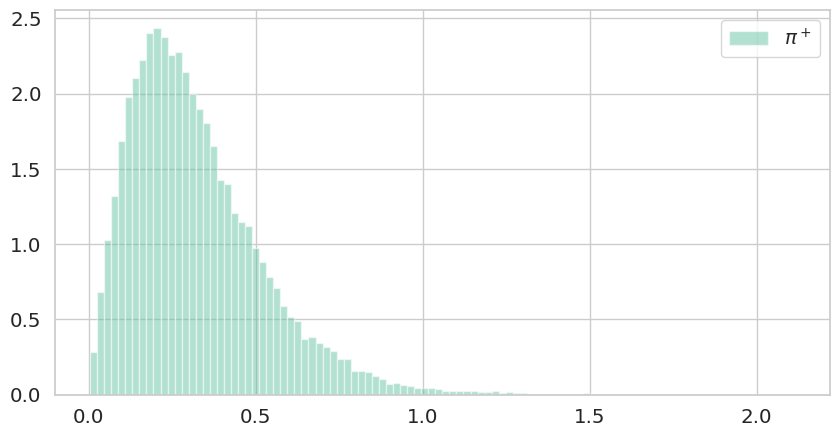

In [7]:
plt.figure(figsize=(10, 5))

plt.hist(pT_plus, alpha=0.5, bins=100, density=True, label='$\pi^+$')

plt.legend()
plt.show()

По формуле для `MDE` вычислите необходимый размер выборки.

In [8]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
eps = 0.02  # размер эффекта

# сумма квантилей
q = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)

In [9]:
var_0 = pT_plus.var()
n_0 = q**2 * var_0/ eps**2

n_0, var_0

(639.8013936429767, 0.04139396496513863)

In [16]:
pT_plus.describe(np.linspace(0.01,0.99,9))

count    20000.000000
mean         0.324110
std          0.203455
min          0.003435
1%           0.031838
13.2%        0.122675
25.5%        0.179397
37.8%        0.229964
50%          0.284422
62.3%        0.346122
74.5%        0.424607
86.8%        0.541018
99%          0.976897
max          2.113151
Name: pT, dtype: float64

Обрежем выбросы, чтобы уменьшить дисперсию

**Внимание! Удалять выбросы можно только на основе данных до эксперимента. Например, не рассматривать в эксперименте пользователя, на котором произошел выброс. Удаление пользователей по выбросам по экспериментальным данных может привести к большим ошибкам.**

In [17]:
pT_plus = pT_plus[pT_plus < 0.97]

In [18]:
var_0 = pT_plus.var()
n_0 = q**2 * var_0 / eps**2

n_0, var_0

(528.202596081394, 0.03417372949470209)

Посмотрим на зависимость размера выборки в исследовании от размера эффекта. Какой минимальный эффект можно зафиксировать с нашей выборкой?

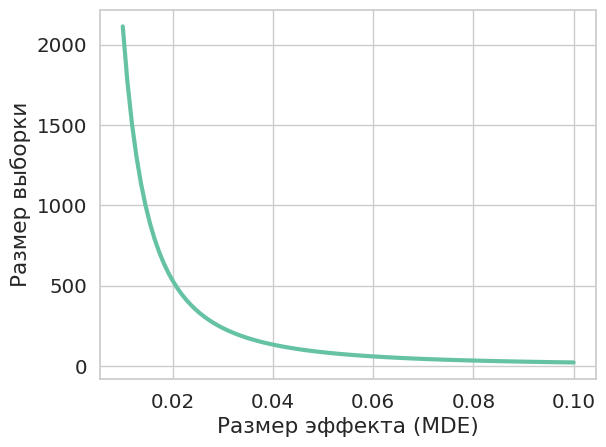

In [19]:
eps = np.linspace(0.01, 0.1, 100)
n = q**2 * var_0 / eps**2

plt.plot(eps, n, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

In [20]:
(q**2 * var_0 / len(pT_plus))**0.5# минимальный эффект, который можно задетектировать с данной выборкой

0.003267190435483464

### Задача 1
#### **Профиль биология**

Рассмотрим данные [данные по медицинским страховкам](https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv) из задачи 2 задания по AВ тестам. С помощью формулы для `MDE` оцените количество клиентов страховых компаний, на которых нужно провести AB-тест новых рекомендаций по употреблению витаминов, чтобы задетектировать снижение средней стоимости страховки на 600 долларов. Считайте, что компании не расширяют свою клиентскую базу и данные представляют всех клиентов, которые могут участвовать в тесте

In [21]:
!pip install opendatasets

In [23]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?select=Train_Data.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 92.3k/92.3k [00:00<00:00, 554kB/s]

In [43]:
DATA_PATH ='medical-insurance-cost/Train_Data.csv'# pd.read_csv()

In [44]:
data = pd.read_csv(DATA_PATH)['charges'].values # before_exp

In [45]:
data.shape

(3630,)

In [46]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
eps = 600  # размер эффекта

# сумма квантилей
q = sps.norm.ppf(1-alpha) +  sps.norm.ppf(beta)

var_0 = data.var()

n_0 = q**2 * var_0 / eps**2  # размер выборки

n_0, var_0

(1982.6823374685732, 115448286.96320984)

Достаточно ли у вас клиентов для исследования?

**Ответ:** Достаточно. 2_000 < 3_000


Посмотрим на распределение суммы страховки

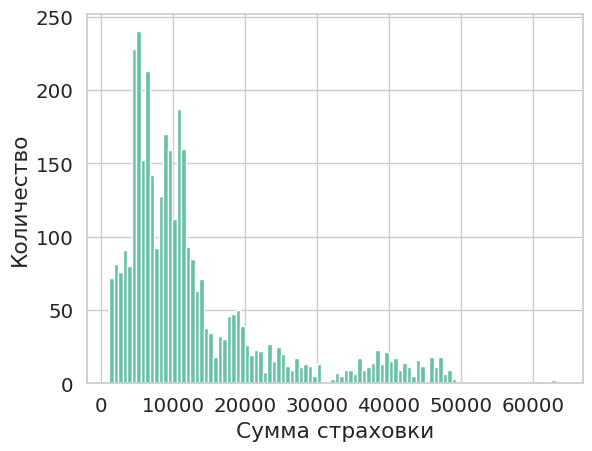

In [47]:
plt.hist(data, bins=100)
plt.xlabel('Сумма страховки')
plt.ylabel('Количество');

Видим, что есть выбросы, завышающие нам дисперсию.

In [40]:
data_1 = data[data < 50_000]

In [41]:
data_1.shape

(3621,)

**Внимание! Удалять выбросы можно только на основе данных до эксперимента. Например, не рассматривать в эксперименте клиента, на котором произошел выброс. Удаление клиентов по выбросам по экспериментальным данных может привести к большим ошибкам.**

Посчитаем, сколько нужно пользователей

In [48]:
var_1 = data_1.var()
n_1 = q*2 * var_1 / eps**2

n_1, var_1

(1528.1795939703613, 110627431.3413543)

С помощью удаления выбросов мы сократили требуемое количество клиентов пропорционально уменьшению дисперсии.

In [49]:
n_0 / n_1, var_0 / var_1

(1.2974144827555045, 1.0435773981498333)

Как зависит требуемый размер выборки в исследовании от размера эффекта? Постройте график размера выборки от `MDE` для ожидаемой в нашем исследовании дисперсии и сделайте выводы.

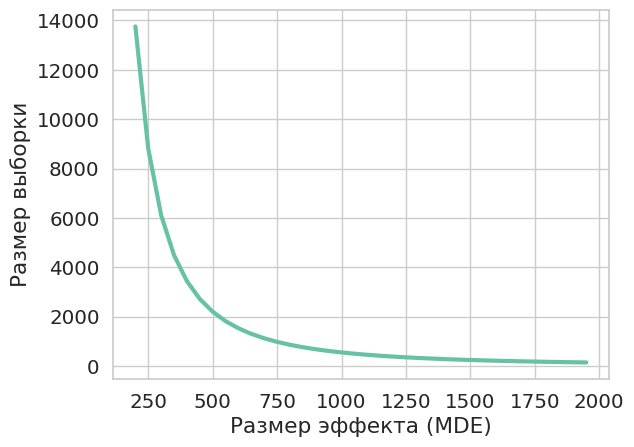

In [50]:
eps = np.arange(200, 2000, 50)
n = q*2 * var_1 / eps**2

plt.plot(eps, n, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

**Вывод:** квадратично

---
### Задача 2

Выведите формулу `MDE` для относительного t-теста.

Подход к поиску дисперсии отношения двух случайных величин описан в https://www.stat.cmu.edu/~hseltman/files/ratio.pdf

$$
    \mathbf{D}\frac{R}{S} \approx \frac{\mu_R^2}{\mu_s^2} \left[ \frac{\sigma_R^2}{\mu_R^2} - 2 \frac{Cov(R,S)}{\mu_R \mu_S}+ \frac{\sigma^2_S}{\mu_S^2} \right]
$$

Дисперсия отношения разности к значению запишется как:
$$
    \mathbf{D}\frac{\bar{E}-\bar{C}}{\bar{C}} \approx \frac{(\mathbf{E}\bar{T}- \mathbf{E}\bar{C})^2}{\mathbf{E}\bar{C}^2} \left[ \frac{\mathbf{D}[\bar{T}-\bar{C}]}{\mathbf{E}\bar{C}^2} - 2 \frac{Cov(T-C,C)}{\mathbf{E}[\bar{T}-\bar{C}]\mathbf{E}\bar{C}}+ \frac{\mathbf{D}\bar{C}}{\mathbf{E}\bar{C}^2} \right]
    \tag{1}
$$

Тогда MDE:
$$
    MDE = (Z_{1-\alpha} + Z_{\beta}) \sqrt{ \mathbf{D}\frac{\bar{E}-\bar{C}}{\bar{C}}}
$$

Формула отличается от обычного теста отсутствием деления на корень размера выборки. Это связанро с тем, что оценивается дисперсия **усредненной** случайной величины.


---
### Задача 3
#### **Профиль физика**


Квантовые компьтеры состоят из кубитов, каждый из которых по-отдельности можно представить в виде единичного вектора на сфере. Считывание состояние кубита — это получение проекции этого вектора на ось $z$, причём считав состояние один раз мы получаем детерменированное значение: 0 или 1. Таким образом для получения значения проекции с определённой точностью мы усредняем некоторое количество считываний.

В данной задаче мы будем генерировать выборку из распределения Бернулли, симулируя проекции, получаемые от кубита. Наша задача — исследовать минимальный размер выборки для разных значений разделения состояний.


Выберите или оцените каким-нибудь способом:

1. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

2. Размеры A и B групп;

3. Желаемый минимальный детектируемый эффект;

4. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.


> Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

**Ответ:** C



> Мощность критерия

**Ответ:**

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Будем подбирать по таблице `MDE`-мощность-размер выборки

In [136]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_R: оценка дисперсии выборок
    :param two_sided: двусторонний ли критерий
    :returns: теоретический MDE
    '''

    quantile = sps.norm.ppf(1-alpha) + sps.norm.ppf(beta)
    return quantile * (var_R / sample_size)**0.5


def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_R: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    quantile = sps.norm.ppf(1-alpha) + sps.norm.ppf(beta)
    return (var_R * (quantile /mde) **2).astype(int)

Создадим датасеты для разных значений проекций. Задайте размер выборок size=2000.

In [137]:
data = np.array([np.random.binomial(1,p,size=2000) for p in np.linspace(0.3, 0.8, 6)]) # возьмём центральные значения проекций

In [138]:
data.shape

(6, 2000)

Вычислим значения таблицы.

In [139]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(1, -1,1)  # абсолютный MDE
beta_grid = np.arange(0.6, 1, 0.05).reshape(1,1,-1)   # мощность
alpha = 0.05
var = data.var(axis=1).reshape(-1,1,1) # дисперсия

sample_sizes = get_sample_size(
    alpha = alpha,
    beta = beta_grid,
    mde = mde_grid,
    var_R=var
)
sample_sizes.shape

(6, 9, 8)

Посмотрим для крайних и центрального значений, как выглядит таблица.

In [140]:
pd.DataFrame(sample_sizes[0], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,7879,9012,10289,11763,13519,15720,18726,23664
0.02,1969,2253,2572,2940,3379,3930,4681,5916
0.03,875,1001,1143,1307,1502,1746,2080,2629
0.04,492,563,643,735,844,982,1170,1479
0.05,315,360,411,470,540,628,749,946
0.06,218,250,285,326,375,436,520,657
0.07,160,183,209,240,275,320,382,482
0.08,123,140,160,183,211,245,292,369
0.09,97,111,127,145,166,194,231,292


In [141]:
pd.DataFrame(sample_sizes[2], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,9001,10296,11755,13438,15445,17960,21394,27035
0.02,2250,2574,2938,3359,3861,4490,5348,6758
0.03,1000,1144,1306,1493,1716,1995,2377,3003
0.04,562,643,734,839,965,1122,1337,1689
0.05,360,411,470,537,617,718,855,1081
0.06,250,286,326,373,429,498,594,750
0.07,183,210,239,274,315,366,436,551
0.08,140,160,183,209,241,280,334,422
0.09,111,127,145,165,190,221,264,333


In [142]:
pd.DataFrame(sample_sizes[5], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,5840,6680,7627,8719,10021,11652,13880,17541
0.02,1460,1670,1906,2179,2505,2913,3470,4385
0.03,648,742,847,968,1113,1294,1542,1949
0.04,365,417,476,544,626,728,867,1096
0.05,233,267,305,348,400,466,555,701
0.06,162,185,211,242,278,323,385,487
0.07,119,136,155,177,204,237,283,357
0.08,91,104,119,136,156,182,216,274
0.09,72,82,94,107,123,143,171,216


Какой размер детектируемого эффекта мы возьмём и какой для него размер выборок?

**Ответ:**



Для выбранного критерия проведите АА-тест по сгенерированным данным.

In [58]:
new_data = sps.bernoulli.rvs(0.5, size=2000)

In [59]:
sample_size = 100
mde = 0.01
alpha = 0.05

In [ ]:
def absolute_ttest(x, y, alpha=0.05):
    '''
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = <...>
    var = <...>
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = q*()
    right_bound = <...>

    return stat, left_bound, right_bound, pvalue

In [ ]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(<...>, (2, sample_size), replace=False)

    p_val = <...>
    p_vals.append(p_val)

p_vals = np.array(p_vals)

In [ ]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

In [ ]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите на гистограмму pvalue.

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:**


In [ ]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(<...>, (2, sample_size), replace=False)

    sample2 = sample2 + <...>
    sample2 += sps.norm.rvs(size=len(sample2), scale=0.1)

    pvals.append(<...>)

pvals = np.array(pvals)

In [ ]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

**Вывод**



### Задача 3
#### **Профиль биология**

В одной фармацевтической компании собираются проводить II фазу клинических испытаний нового лекарства, ослабляющего симптомы диабета. Перед командой аналитики стоит задача о корректном проведении AB-тестирования. У вас имеются исторические [данные по пациентам](https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv), страдающим диабетом. С помощью них проведите дизайн эксперимента.


Выберите или оцените каким-нибудь способом:

1. Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и тд.;

2. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

3. Размеры A и B групп;

4. Желаемый минимальный детектируемый эффект;

5. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.

Все ли полученные показатели вас устраивают? Если нет, то какие могут быть способы их улучшить?

*Примечание.* Если кажется, что информации недостаточно, сделайте свои дополнительные предположения, коррелирующие с реальностью, и работайте с ними.


Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [143]:
od.download('https://www.kaggle.com/datasets/jillanisofttech/diabetes-disease-updated-dataset?select=diabetes.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 8.91k/8.91k [00:00<00:00, 13.5MB/s]

In [341]:
DATA_PATH = '/content/diabetes-disease-updated-dataset/diabetes.csv'

In [342]:
data = pd.read_csv(DATA_PATH)
data = data[data['Outcome']==1]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


Выберите, обоснуйте и визуализируйте:

> Таргет клинических испытаний (первичную контрольную точку): уровень глюкозы, инсулина, толщину кожи и тд.;

**Ответ:**

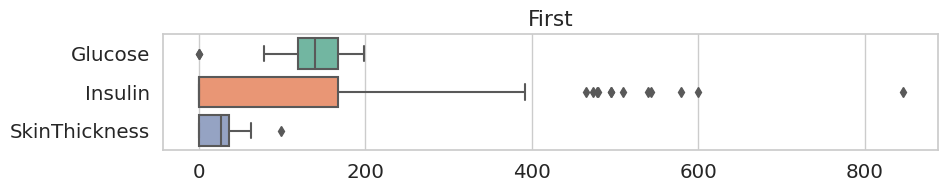

In [343]:
plt.figure(figsize=(10, 1.5))
sns.boxplot(data[['Glucose','Insulin','SkinThickness']], orient='h')
plt.title('First')
plt.show()

> Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

**Ответ:** двусторонний t-test, независимые выборки

> Мощность критерия

**Ответ:** 0.8

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Будем подбирать по рассмотренной на семинаре таблице `MDE`-мощность-размер выборки

In [344]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_R: оценка дисперсии выборок
    :param two_sided: двусторонний ли критерий
    :returns: теоретический MDE
    '''

    quantile = sps.norm.ppf(1-alpha) + sps.norm.ppf(beta)
    return quantile * (var_R / sample_size)**0.5


def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_R: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    quantile = sps.norm.ppf(1-alpha) + sps.norm.ppf(beta)
    return (var_R * (quantile /mde) **2).astype(int)

In [345]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)  # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = data['Glucose'].var() * 2 / (data['Glucose'].mean()**2)  # относительная дисперсия

sample_sizes = get_sample_size(alpha,beta_grid,mde_grid,var)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,3684,4214,4811,5500,6321,7351,8756,11065
0.02,921,1053,1202,1375,1580,1837,2189,2766
0.03,409,468,534,611,702,816,972,1229
0.04,230,263,300,343,395,459,547,691
0.05,147,168,192,220,252,294,350,442
0.06,102,117,133,152,175,204,243,307
0.07,75,86,98,112,129,150,178,225
0.08,57,65,75,85,98,114,136,172
0.09,45,52,59,67,78,90,108,136


**Ответ:** mde 0.07 и мощность 0.8 -> 112. Размер выборки достаточен для проведения A-A теста

Для выбранного критерия проведите АА-тест по историческим данным. Если исторических данных оказалось недостаточно для вашей модели, придумайте способ решения проблемы.

In [346]:
sample_size = 98
mde = 0.08
alpha = 0.05

In [347]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_mean_var = np.var(x) / len(x)
    y_mean_var = np.var(y) / len(y)

    #print(x_mean,y_mean,x_mean_var,y_mean_var)


    # https://habr.com/ru/companies/avito/articles/571094/
    stat = (x_mean - y_mean) / y_mean
    var = (
        (x_mean_var + y_mean_var) / (y_mean)**2 +
        y_mean_var * (
            (x_mean - y_mean)**2 / y_mean** 4 +
            2 * (x_mean - y_mean) / y_mean** 3
        )
    )
    std = np.sqrt(var)


    z_stat =  stat / std # считается дисперсия среднего статистики, поэтому не делим на корень
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std
    right_bound =  q * std

    return stat, left_bound, right_bound, pvalue

In [261]:
# синтетический пример для отладки теста
p_vals = []
for i in tqdm(range(2000)):
    # 4.a. Тестирую A/B-тест.
    control,test = sps.expon(scale=10).rvs(2000),sps.expon(scale=10).rvs(2000)
    p_val = relative_ttest(control,test,alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:05<00:00, 388.31it/s]


In [352]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    p_val = relative_ttest(sample1,sample2,alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:01<00:00, 1479.29it/s]


In [353]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

Реальный уровень значимости: 0.06


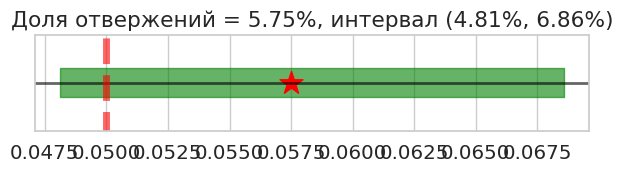

In [354]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value

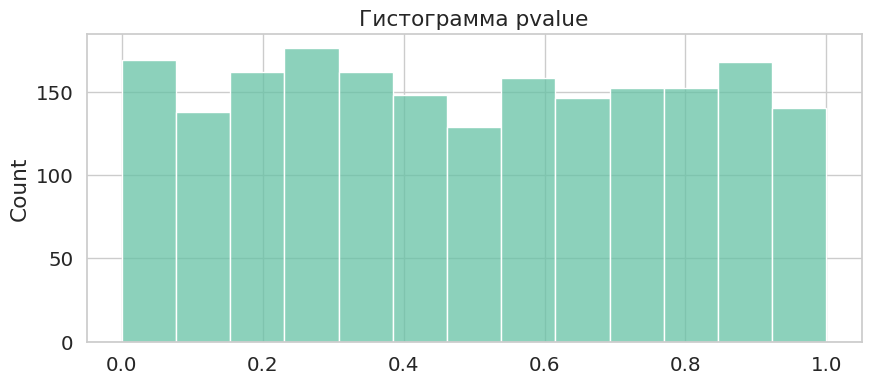

In [355]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:** критерий нормальный

Проверьте также мощность критерия на выбранном `MDE`.


In [348]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(data['Glucose'], (2, sample_size), replace=False)

    sample2 = sample2 * 1.09
    sample2 += sps.norm.rvs(size=len(sample2), scale=10)

    pvals.append(relative_ttest(sample2,sample1)[3])

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:05<00:00, 359.64it/s]


In [349]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.724


**Вывод** реальная мощность ниже теоретической

---

### Задача 4
#### **Профиль физика**


Рассмотрим [данные о звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv) из предыдущего домашнего задания:

Датасет содержит информацию о звездах, где `POP` - разделяет звёзды по классам. Нас будeт интересовать столбец `Dnu`.

Считайте данные.

In [60]:
od.download('https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mashalovne
Your Kaggle Key: ··········


100%|██████████| 10.7k/10.7k [00:00<00:00, 4.52MB/s]

In [264]:
df = pd.read_csv("/content/classification-in-asteroseismology/classification_in_asteroseismology.csv")

In [272]:
feature = df['Dnu']
df

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


Получите таблицу `MDE`-мощности-размера выборки для параметра `Dnu` как в 3-м задании, но теперь проведя относительный ttest и написав его функцию.

In [273]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    x_mean = np.mean(x)
    y_mean = np.mean(y)

    x_mean_var = np.var(x) / len(x)
    y_mean_var = np.var(y) / len(y)

    #print(x_mean,y_mean,x_mean_var,y_mean_var)


    # https://habr.com/ru/companies/avito/articles/571094/
    stat = (x_mean - y_mean) / y_mean
    var = (
        (x_mean_var + y_mean_var) / (y_mean)**2 +
        y_mean_var * (
            (x_mean - y_mean)**2 / y_mean** 4 +
            2 * (x_mean - y_mean) / y_mean** 3
        )
    )
    std = np.sqrt(var)


    z_stat =  stat / std # считается дисперсия среднего статистики, поэтому не делим на корень
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std
    right_bound =  q * std

    return stat, left_bound, right_bound, pvalue

In [275]:
var

0.5390732988230494

In [276]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1) # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = feature.var() * 2 / (feature.mean()**2)  # относительная дисперсия

sample_sizes = get_sample_size(
    alpha=alpha,
    beta = beta_grid,
    mde=mde_grid,
    var_R=var
)
print(sample_sizes.shape)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

(9, 8)


,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,19423,22218,25366,28998,33328,38755,46165,58339
0.02,4855,5554,6341,7249,8332,9688,11541,14584
0.03,2158,2468,2818,3222,3703,4306,5129,6482
0.04,1213,1388,1585,1812,2083,2422,2885,3646
0.05,776,888,1014,1159,1333,1550,1846,2333
0.06,539,617,704,805,925,1076,1282,1620
0.07,396,453,517,591,680,790,942,1190
0.08,303,347,396,453,520,605,721,911
0.09,239,274,313,358,411,478,569,720


Какие значения `MDE`, достоверности и размера выборки стоит выбрать?

**Ответ:** 0.8 мощность и 0.09 эффект -> размер выборки подойдет для анализа теста


Далее как в 3-й задаче по физике посмотрим на реальный уровень значимости, гистограмму p_value и реальный уровень значимости.

In [283]:
sample_size = 420
mde = 0.09
alpha = 0.05

In [288]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(feature, (2, sample_size), replace=False)

    p_val = relative_ttest(sample1,sample2)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:01<00:00, 1470.44it/s]


Реальный уровень значимости: 0.04


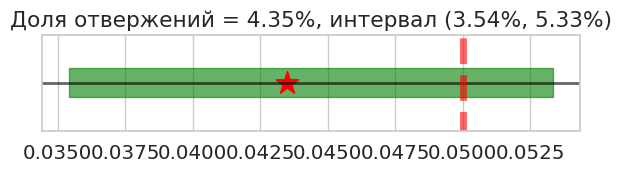

In [289]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value.

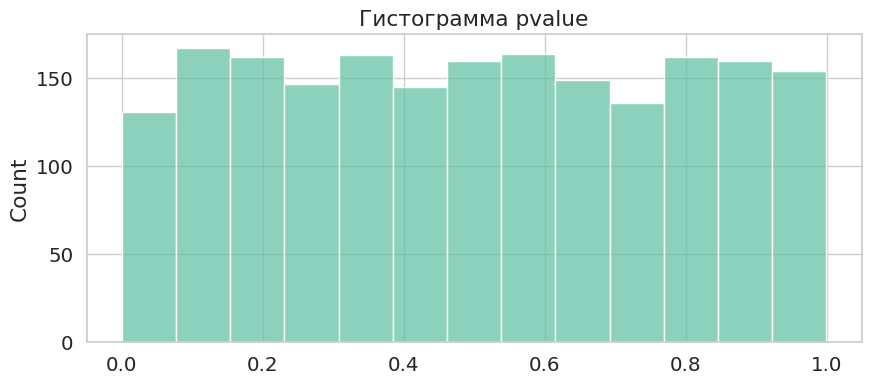

In [290]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Что можно сказать о валидности критерия?

**Ответ:** критерий валиден

Проверьте также мощность критерия на выбранном `MDE`.


In [299]:
# синтетический пример для отладки теста
p_vals = []
for i in tqdm(range(2000)):
    # 4.a. Тестирую A/B-тест.
    control,test = sps.expon(scale=10).rvs(2000),sps.expon(scale=10).rvs(2000)
    p_val = relative_ttest(control,test,alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:01<00:00, 1299.60it/s]


In [316]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(feature, (2, sample_size), replace=False)

    sample2 = sample2 * 1.09
    sample2 += sps.norm.rvs(size=len(sample2), scale=0.01)

    pvals.append(relative_ttest(sample2,sample1)[3])

pvals = np.array(pvals)

100%|██████████| 2000/2000 [00:01<00:00, 1282.61it/s]


In [317]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.64


Мощность критерия меньше теоретического

Теперь воспользуемся стратификацией. Будем разбивать на страты по параметру `POP` выборки.

Реализуйте функции для стратифицированного семплирования и стратифицированного относительного t-test. Заранее вспомните с семинара, какое семплирование какому тесту подходит. Не забудьте о возможности пост-стратификации. Какие методы подойдут вам, учитывая количество страт и размер выборки?

**Ответ:**

In [318]:
def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.

    :param data: исходные данные
    :return: веса страт
    '''

    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights


def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return np.sum(strata_means * weights)


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data.sum()


def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]

def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''

    groupped = data.groupby('strata')

    # Веса страт
    strata_weights = groupped.size() / len(data)

    # Размер выборок
    strata_sample_size = (sample_size * strata_weights).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(groupped):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    return np.sum(strata_vars * strata_weights)

def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data.var()

In [319]:
def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.

    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''

    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var

    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)

    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var )

    t_stat = np.sqrt(len(x_data)) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = - q * std / np.sqrt(len(x_data))
    right_bound = q * std / np.sqrt(len(x_data))

    return stat, left_bound, right_bound, pvalue

Теперь проверим корректность применения стратификации в нашем случае.

Сначала создадим отдельный датасет для более удобной проверки. У него будет две колонки: `sample`, `strata`, которые соответствуют данным и разделением на страты у исходного датасета.

In [320]:
data = pd.DataFrame()
data['strata'] = df['POP']
data['sample'] = df['Dnu']
data = data[['strata', 'sample']]
data

,strata,sample
0,1,4.44780
1,0,6.94399
2,1,2.64571
3,1,4.24168
4,0,10.44719
...,...,...
996,0,5.51582
997,1,4.14823
998,1,3.98294
999,1,4.33893


Посмотрите на `boxplot` для двух подгрупп.

<Axes: xlabel='strata', ylabel='sample'>

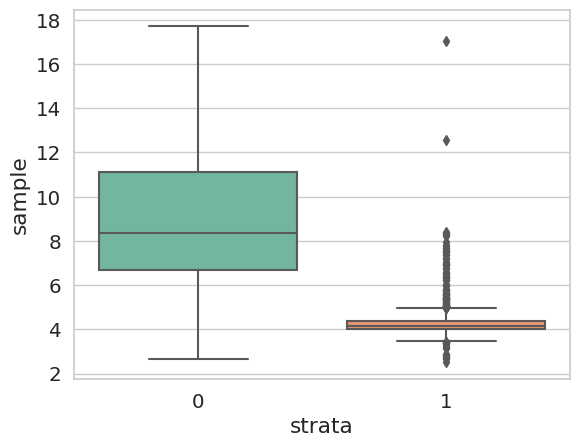

In [325]:
sns.boxplot(data, x='strata', y='sample')

In [322]:
data['strata'].sum()

713

Что вы можете сказать уже сейчас о том, повлияет ли стратификация на результаты теста?

**Ответ:** Средние значительно отличаются, это позволит существенно уменьшить дисперсию. Есть незначительный дисбаланс классов, который может привести к нестабильности теста



In [334]:
p_vals = []
strata_weights = calculate_strata_weights(data)

for i in tqdm(range(2000)):

    control_sample, test_sample = random_sampler(data,sample_size=500)

    p_vals.append(stratified_ttest(control_sample,test_sample,strata_weights,method='stratified')[3])

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:14<00:00, 135.10it/s]


Посмотрите также на реальный уровень значимости и гистограмму p-value

Реальный уровень значимости: 0.05


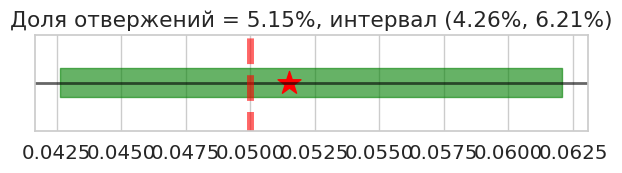

In [335]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Корректны ли выбранные методы?

**Ответ:** Да

Посмотрите на мощность критерия. Улучшилась ли мощность по сравнению с обработкой без стратификации?

In [339]:
p_vals = []
strata_weights = calculate_strata_weights(data)

for i in tqdm(range(2000)):

    control_sample, test_sample = random_sampler(data,sample_size=500)

    test_sample['sample'] *= 1.09


    test_sample['sample'] += sps.norm.rvs(size=len(test_sample), scale=0.01)

    p_vals.append(stratified_ttest(control_sample,test_sample,strata_weights,method='stratified')[3])

p_vals = np.array(p_vals)

100%|██████████| 2000/2000 [00:12<00:00, 155.15it/s]


In [340]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.64


**Ответ на вопрос о мощности:** мощность теста такая же как и относительного не стратифицированного

---
### Задача 5

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

...

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

...

Реализуйте эту процедруру.

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.